In [1]:
# ### get the country(city) name:
# import requests

# url = "https://api.openaq.org/v2/countries?limit=100&page=1&offset=0&sort=asc&order_by=name"

# headers = {
#     "accept": "application/json",
#     "content-type": "application/json"
# }

# response = requests.get(url, headers=headers)

# print(response.text)

# import requests

# url = "https://api.openaq.org/v2/cities?limit=100&page=1&offset=0&sort=asc&order_by=city"

# headers = {"accept": "application/json"}

# response = requests.get(url, headers=headers)

# print(response.text)

In [2]:
import pandas as pd
import requests

# Set the endpoint and parameters for the API request
endpoint = 'https://api.openaq.org/v2/measurements'
city = 'Hong Kong'
parameters_list = ['pm25', 'no2', 'so2', 'pm10', 'o3', 'co']  # list of parameters
date_from = '2022-01-01'
date_to = '2023-01-31'

all_measurements = pd.DataFrame()

for parameter in parameters_list:
    params = {
        'city': city,
        'parameter': parameter,
        'date_from': date_from,
        'date_to': date_to,
        'limit': 10000  # maximum number of results per request
    }

    # send the API request
    response = requests.get(endpoint, params=params)
    if response.status_code == 200:
        # Extract the measurement data
        measurements = response.json()['results']
        df = pd.DataFrame(measurements)
        all_measurements = pd.concat([all_measurements, df], ignore_index=True)

all_measurements['latitude'] = all_measurements['coordinates'].apply(lambda x: x['latitude'])
all_measurements['longitude'] = all_measurements['coordinates'].apply(lambda x: x['longitude'])
all_measurements['datetime'] = pd.to_datetime(all_measurements['date'].apply(lambda x: x['utc']))
all_measurements['Date_Time'] = pd.to_datetime(all_measurements['datetime'])
all_measurements = all_measurements.drop(['date', 'datetime', 'coordinates'], axis=1)

csv_file_path = 'air_quality_data_HK.csv'
all_measurements.to_csv(csv_file_path, index=False)

print("Data saved to:", csv_file_path)
print(all_measurements.head())


Data saved to: air_quality_data_HK.csv
   locationId  location parameter  value   unit country  city  isMobile  \
0      233336  Southern      pm25   14.1  µg/m³      CN  None     False   
1      233336  Southern      pm25   14.9  µg/m³      CN  None     False   
2      233336  Southern      pm25   10.7  µg/m³      CN  None     False   
3      233336  Southern      pm25    8.0  µg/m³      CN  None     False   
4      233336  Southern      pm25   12.6  µg/m³      CN  None     False   

  isAnalysis                     entity       sensorType  latitude  longitude  \
0       None  Governmental Organization  reference grade  22.24743  114.16015   
1       None  Governmental Organization  reference grade  22.24743  114.16015   
2       None  Governmental Organization  reference grade  22.24743  114.16015   
3       None  Governmental Organization  reference grade  22.24743  114.16015   
4       None  Governmental Organization  reference grade  22.24743  114.16015   

                  Date_

#### Visulization

##### Time Series Plots

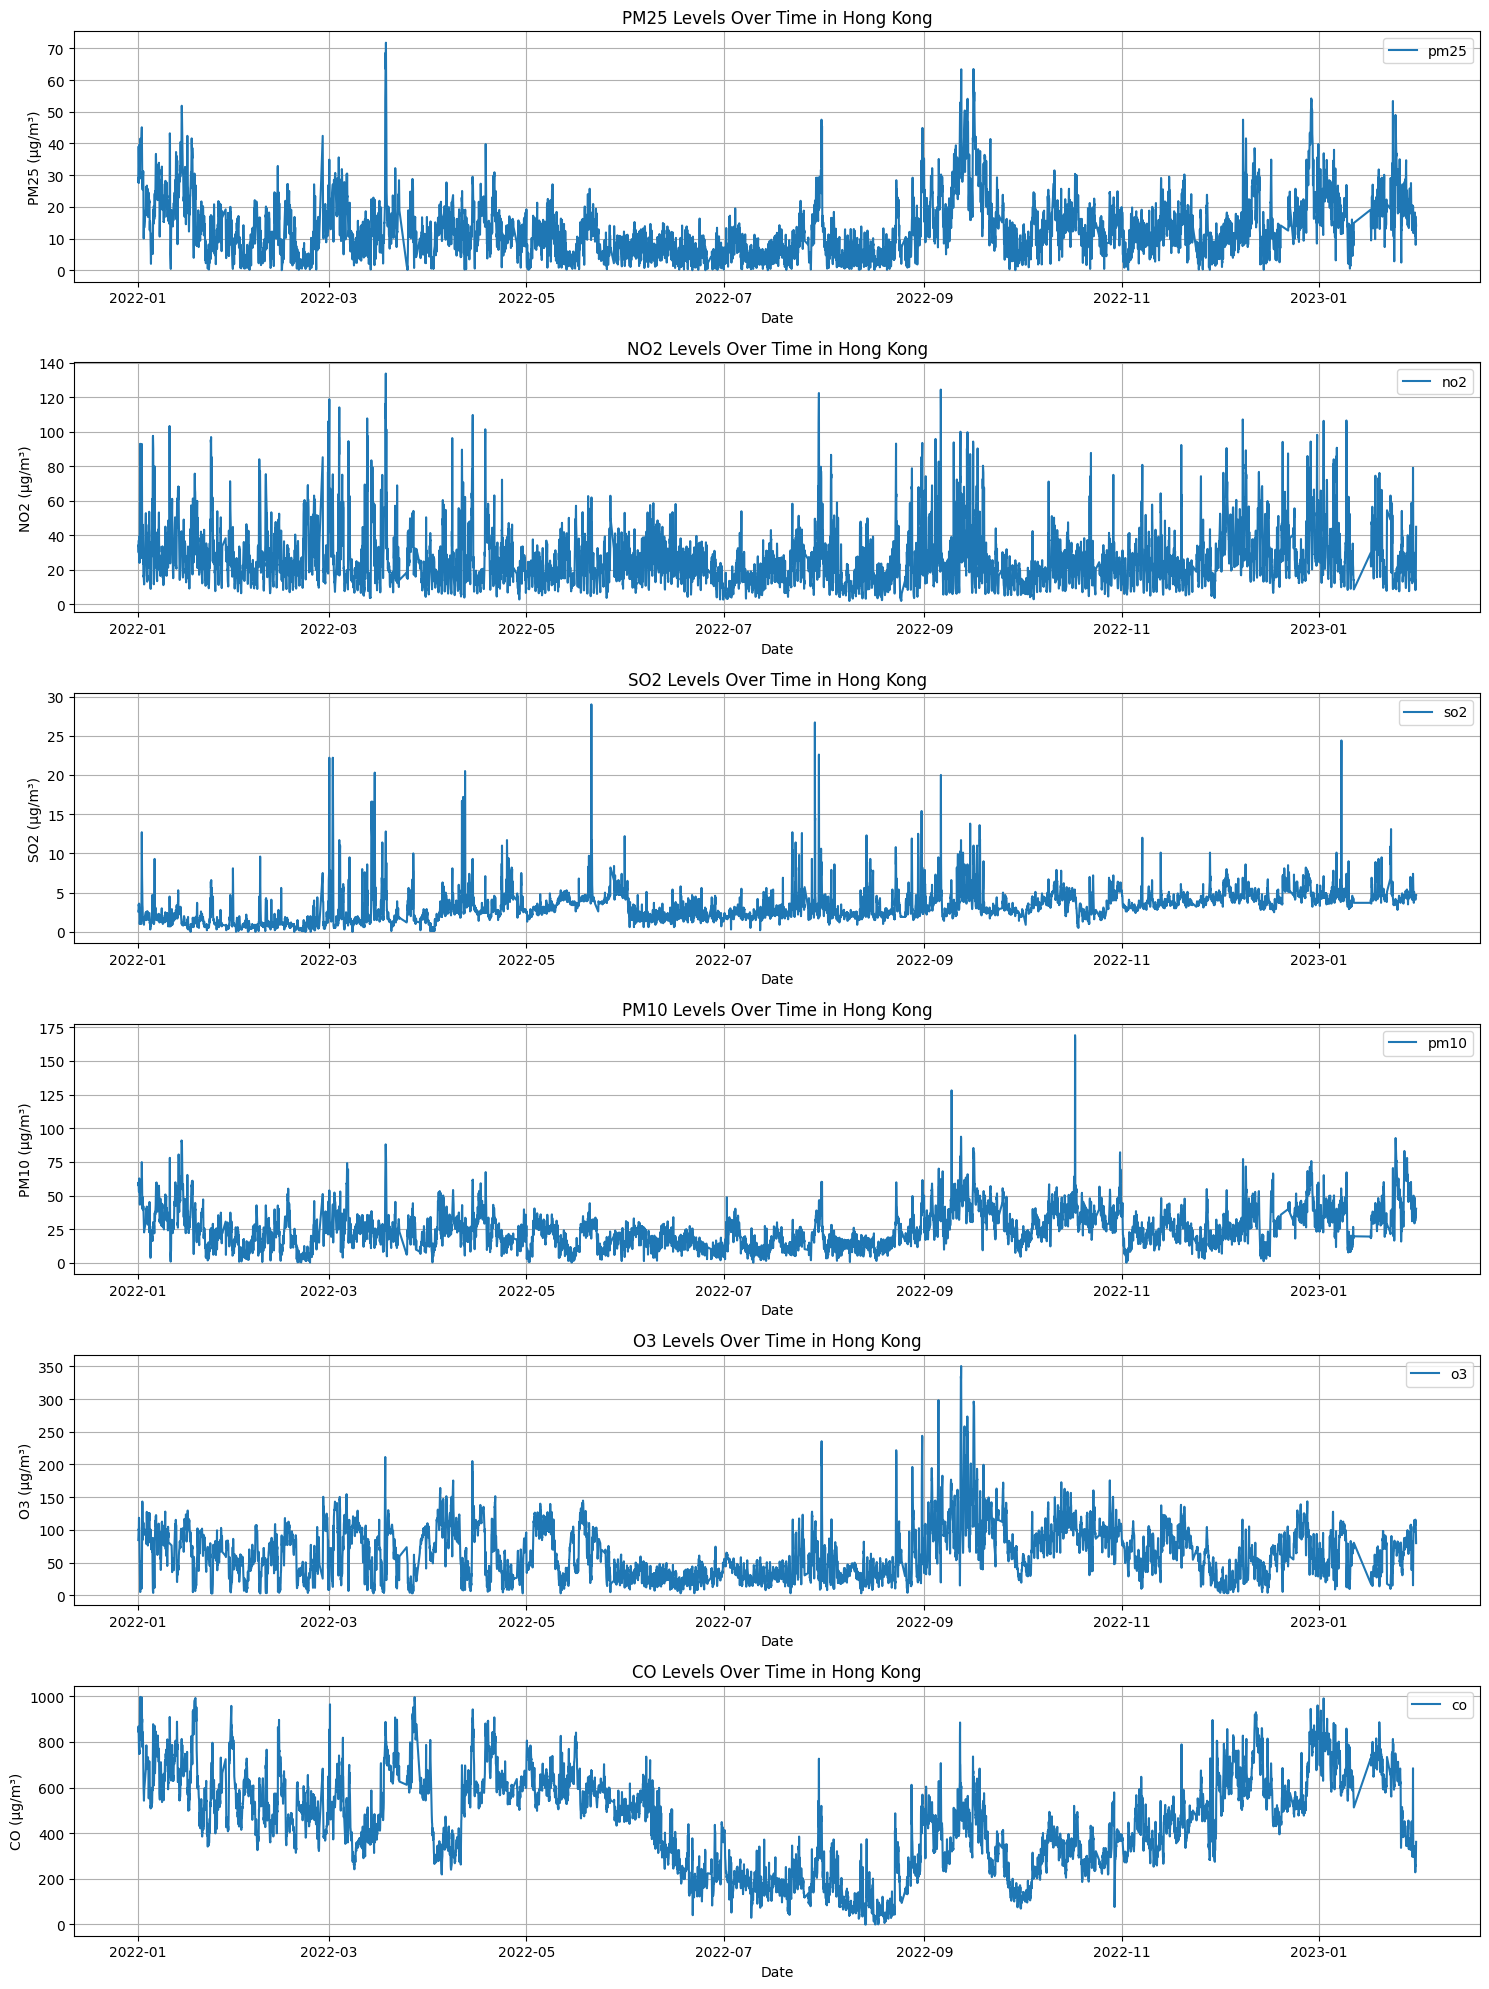

In [3]:
import matplotlib.pyplot as plt
# Set the figure size and create subplots
plt.figure(figsize=(15, 20))

# Loop through each parameter to create a time series plot
for i, parameter in enumerate(parameters_list, 1):
    plt.subplot(len(parameters_list), 1, i)
    parameter_data = all_measurements[all_measurements['parameter'] == parameter]
    plt.plot(parameter_data['Date_Time'], parameter_data['value'], label=parameter)
    plt.title(f'{parameter.upper()} Levels Over Time in Hong Kong')
    plt.xlabel('Date')
    plt.ylabel(f'{parameter.upper()} (µg/m³)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


##### Box Plot

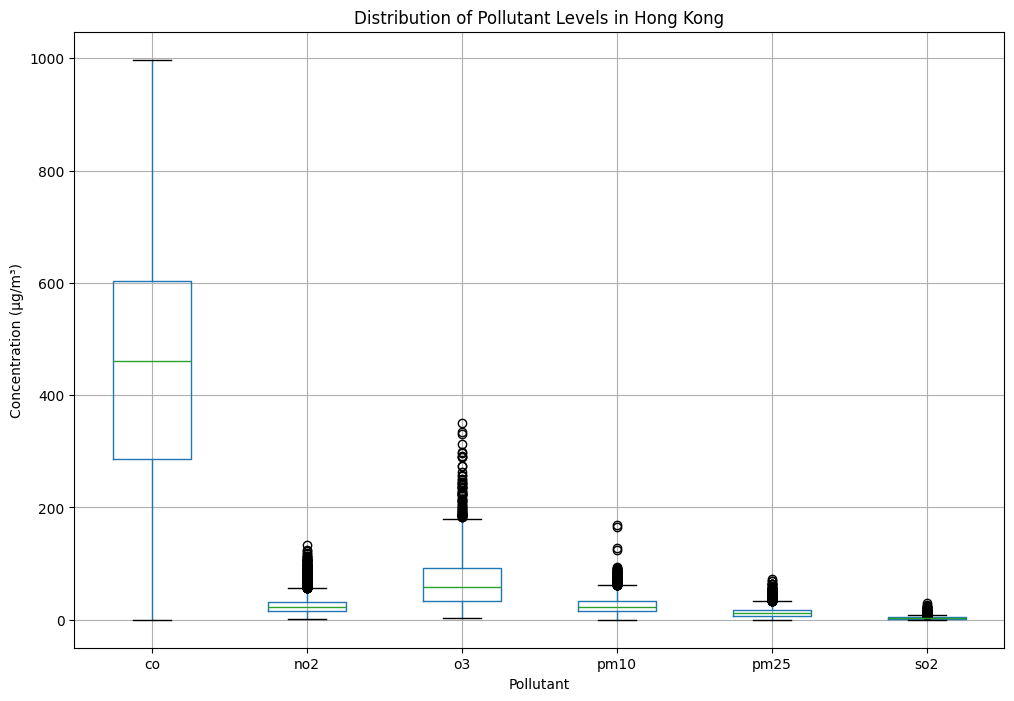

In [4]:
filtered_data = all_measurements[all_measurements['parameter'].isin(parameters_list)]
pivot_data = filtered_data.pivot(columns='parameter', values='value')

plt.figure(figsize=(12, 8))
pivot_data.boxplot()
plt.title('Distribution of Pollutant Levels in Hong Kong')
plt.xlabel('Pollutant')
plt.ylabel('Concentration (µg/m³)')
plt.grid(True)
plt.show()
